In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pre Analysis

In [2]:
file = './data/pre.csv'
df = pd.read_csv(file)  
df.head()

,时间戳记,"1. Have you used VR/MR hardwares before? If yes, please indicate the device in the next question.",2.1 Have you used a 3D labelling tool before?,"2.2 If you have used a 3D labelling tool before, is it a computer-based tool?",3.1 Have you worked in 3D related projects before? e.g. 3D segmentation,"3.2 If you have worked with a 3D-related project, can you describe what kind of project it is?",Which mode is the user testing on?
0,2021-12-6 上午02:57:48,Yes,Yes,Yes,Yes,The purpose was to label satellite imagery,Mode 1
1,2021-12-6 下午05:06:18,No,No,NaN,No,NaN,Mode 1
2,2021-12-6 下午05:46:24,Yes,No,NaN,No,NaN,Mode 1
3,2021-12-6 下午06:22:16,Yes,No,NaN,No,NaN,Mode 1
4,2021-12-7 下午03:23:25,Yes,No,NaN,Yes,"3D segmentation, working with LiDAR Data, GIS ...",Mode 2


## Post Analysis

In [3]:
file = './data/post_only.csv'
df = pd.read_csv(file)  
df.head()

,Timestamp,1. I think that I would like to use this system frequently.,2. I found the system unnecessarily complex.,3. I thought the system was easy to use,4. I think that I would need the support of a technical person to be able to use this system.,5. I found the various functions in this system were well integrated.,6. I thought there was too much inconsistency in this system.,7. I would imagine that most people would learn to use this system very quickly.,8. I found the system very cumbersome to use.,9. I felt very confident using the system.,10. I needed to learn a lot of things before I could get going with this system.,Which mode is the user testing?
0,06/12/2021 10:37:36,Agree,Disagree,Neutral,Neutral,Agree,Disagree,Neutral,Disagree,Neutral,Disagree,Mode 1
1,06/12/2021 11:09:17,Neutral,Disagree,Agree,Neutral,Neutral,Disagree,Strongly agree,Disagree,Neutral,Neutral,Mode 1
2,06/12/2021 11:46:41,Strongly agree,Strongly disagree,Strongly agree,Disagree,Agree,Strongly disagree,Agree,Strongly disagree,Strongly agree,Disagree,Mode 1
3,08/12/2021 16:27:34,Strongly agree,Strongly disagree,Agree,Disagree,Strongly agree,Disagree,Strongly agree,Disagree,Agree,Disagree,Mode 1
4,08/12/2021 16:30:32,Neutral,Disagree,Agree,Disagree,Strongly agree,Disagree,Strongly agree,Strongly disagree,Agree,Strongly disagree,Mode 1


In [5]:
values = {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5}
modes = {'Mode 1': 1, "Mode 2": 2}

data = np.genfromtxt(file, skip_header=1, dtype=str, delimiter=',')[:10, :]

newdata = np.zeros((len(data), data.shape[1]-1))
for i in range(len(data)):
    for j in range(data.shape[1]):
        if data[i, j].startswith('0'):
            continue
        if data[i, j].startswith('M'):
            newdata[i, j-1] = modes[data[i, j]]
            continue
        newdata[i, j-1] = values[data[i, j]]-1 if j in [1, 3, 5, 7, 9] else 5-values[data[i, j]]  
        
newdata = newdata[:, :]
scores = newdata[:, :-1]
# per person
sus = np.sum(scores, axis=1)*2.5
np.histogram(sus, bins=[55, 65, 75, 85, 95])

(array([0, 3, 2, 5]), array([55, 65, 75, 85, 95]))

([<matplotlib.axis.YTick at 0x114791be0>,
 <a list of 5 Text yticklabel objects>)

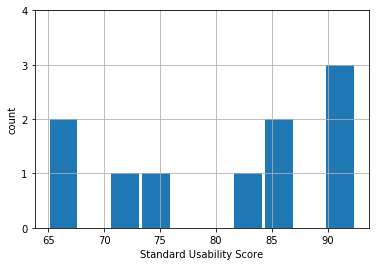

In [6]:
plt.hist(sus, rwidth=0.9)
plt.grid()
plt.xlabel('Standard Usability Score')
plt.ylabel('count')
plt.yticks([0, 1, 2, 3, 4])

77.5


(array([2., 0., 0., 0., 0., 0., 0., 1., 1., 1.]),
 array([65. , 67.5, 70. , 72.5, 75. , 77.5, 80. , 82.5, 85. , 87.5, 90. ]),
 <a list of 10 Patch objects>)

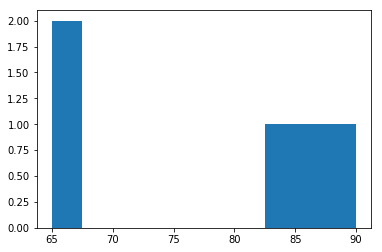

In [7]:
scores_mode1 = newdata[newdata[:, -1]==1.][:, :-1]
# per person
sus = np.sum(scores_mode1, axis=1)*2.5
np.histogram(sus, bins=[55, 65, 75, 85, 95])
print(sus.mean())
plt.hist(sus)

83.5


(array([1., 1., 0., 0., 0., 0., 1., 0., 0., 2.]),
 array([72.5, 74.5, 76.5, 78.5, 80.5, 82.5, 84.5, 86.5, 88.5, 90.5, 92.5]),
 <a list of 10 Patch objects>)

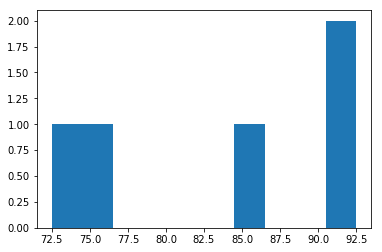

In [8]:
scores_mode2 = newdata[newdata[:, -1]==2.][:, :-1]
# per person
sus = np.sum(scores_mode2, axis=1)*2.5
np.histogram(sus, bins=[55, 65, 75, 85, 95])
print(sus.mean())
plt.hist(sus)

## Total
Usability scores are high and people found the usability of the applications are good.
Two modes achieve similar usability score and differences mainly lie in specific comments. 

### Dynamic
5 participants
- Easy to use, good immersive experience.
- But better to provide more fine-level brush thickness options

### Static
5 participants

- Complex controlls, reminders are needed
- Some people hope to have a more immersive experience (e.g. walk into the room) since it's VR device.

## From user's background
- used VR before: interesting VR experience but one person thinks it severs no purpose
- used 3D labelling tool before: only one person (tried mode 2) found controller more complex than previous tools
- worked on 3D projects before: 2 persons, one said could be used to generate ground truth efficiently, the another one said it's hard to label, improvements needed

## Problems with user study:
only 3 users have experience in 3D projects (only 1 user used 3D labelling tool before) and all of them tried static mode. 2 of them mentioned (including the one user used 3D labelling tool before) it's hard to controll. 